<a href="https://colab.research.google.com/github/gagarcia/COVID-19/blob/master/death_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [0]:
deaths.set_index('Country/Region',inplace = True)

In [0]:
confirmed.set_index('Country/Region',inplace = True)

In [0]:
deaths_clean = deaths.drop(['Province/State','Lat','Long'],axis=1)
confirmed_clean = confirmed.drop(['Province/State','Lat','Long'],axis=1)

In [0]:
deaths_clean.index.name = None
confirmed_clean.index.name = None

In [0]:
deaths_clean = deaths_clean.transpose()
confirmed_clean = confirmed_clean.transpose()

In [0]:
deaths_clean.index = pd.to_datetime(deaths_clean.index, format='%m/%d/%y')
confirmed_clean.index = pd.to_datetime(confirmed_clean.index, format='%m/%d/%y')

In [9]:
confirmed_clean['Brazil']

2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2020-05-08    146894
2020-05-09    156061
2020-05-10    162699
2020-05-11    169594
2020-05-12    178214
Name: Brazil, Length: 112, dtype: int64

In [0]:
Brazil = pd.concat([confirmed_clean['Brazil'],deaths_clean['Brazil']],axis=1)
Brazil.columns = ['Brazil Confirmed', 'Brazil Deaths']

Evolução da dença em escala linear, abaixo vou plotar em escala log pra vermos se a evolução ja saiu de uma exponencial

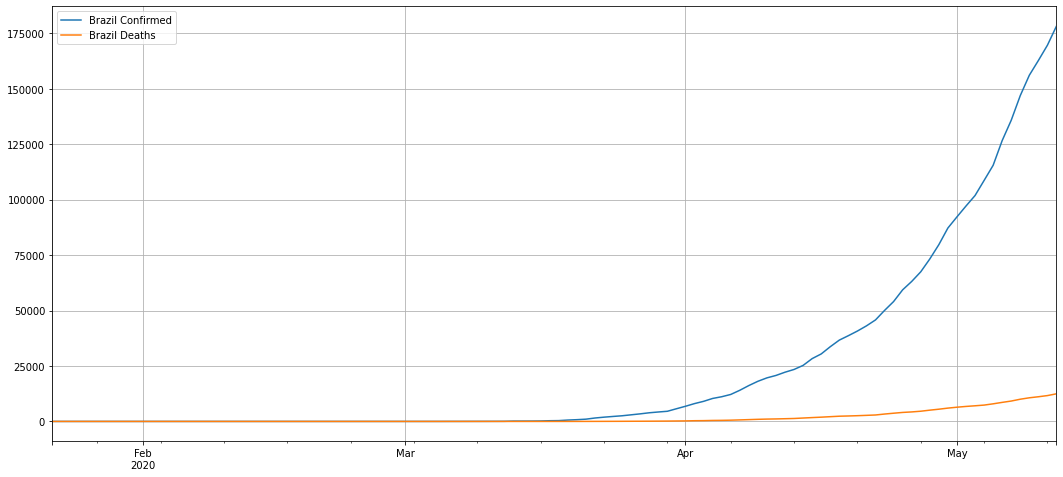

In [11]:
Brazil.plot(figsize=(18,8), grid=True)

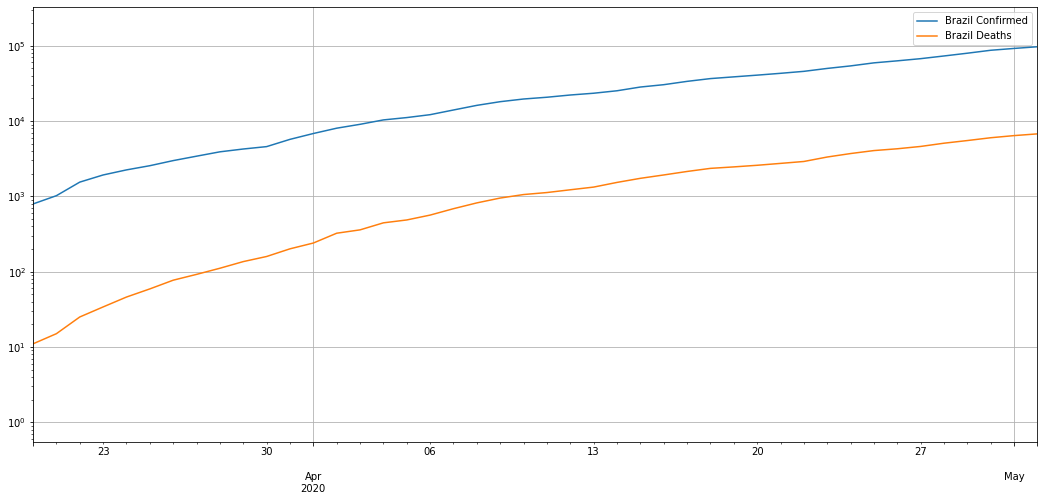

In [12]:
Brazil.plot(figsize=(18,8), grid=True,logy=True,xlim=['2020-03-20','2020-05-02'])

In [13]:
Brazil

,Brazil Confirmed,Brazil Deaths
2020-01-22,0,0
2020-01-23,0,0
2020-01-24,0,0
2020-01-25,0,0
2020-01-26,0,0
...,...,...
2020-05-08,146894,10017
2020-05-09,156061,10656
2020-05-10,162699,11123
2020-05-11,169594,11653


In [14]:
Brazil['First Difference Confirmed'] = Brazil['Brazil Confirmed'] - Brazil['Brazil Confirmed'].shift(1)
Brazil['First Difference Deaths'] = Brazil['Brazil Deaths'] - Brazil['Brazil Deaths'].shift(1)
Brazil.tail()

,Brazil Confirmed,Brazil Deaths,First Difference Confirmed,First Difference Deaths
2020-05-08,146894,10017,11121.0,827.0
2020-05-09,156061,10656,9167.0,639.0
2020-05-10,162699,11123,6638.0,467.0
2020-05-11,169594,11653,6895.0,530.0
2020-05-12,178214,12461,8620.0,808.0


**Novos casos por dia**

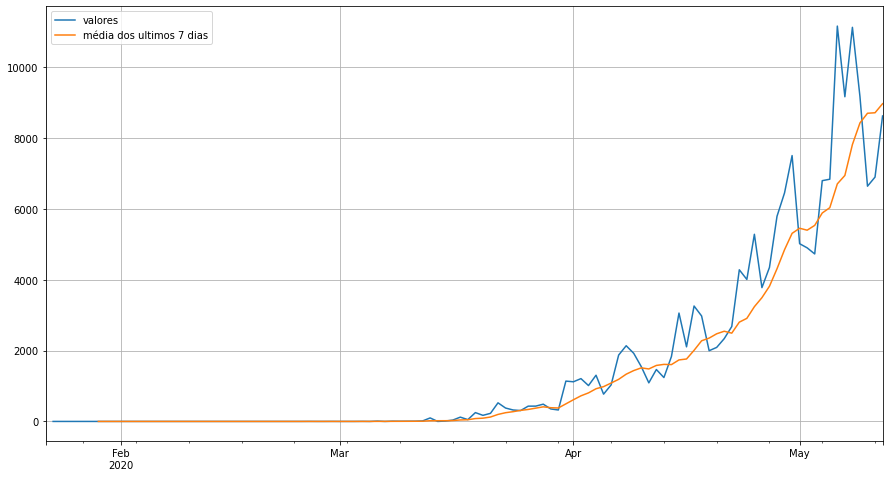

In [15]:
Brazil['First Difference Confirmed'].plot(figsize=(15,8),label = 'valores')
Brazil['First Difference Confirmed'].rolling(7).mean().plot(grid=True,label = 'média dos ultimos 7 dias')
plt.legend()

**Mortes por dia**

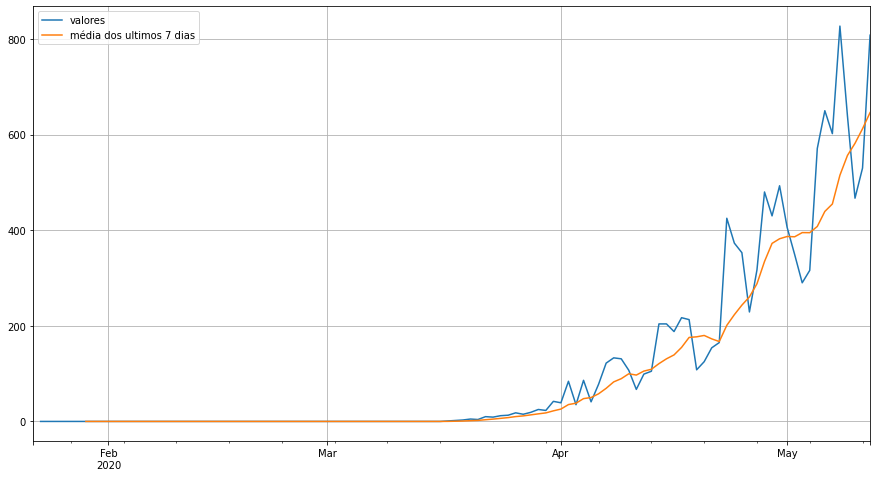

In [16]:
Brazil['First Difference Deaths'].plot(figsize=(15,8), label = 'valores')
Brazil['First Difference Deaths'].rolling(window=7).mean().plot(grid=True,figsize=(15,8),label = 'média dos ultimos 7 dias')
plt.legend()

In [0]:
from pandas.plotting import scatter_matrix

Nos gráficos de mortes por casos confirmados existe uma linearidade, sendo que podemos calcular letalidade conforme abaixo

In [0]:
Brazil['Letalidade'] = Brazil['Brazil Deaths']*100/Brazil['Brazil Confirmed']

Nos graficos de Deaths vs Confirmed parace existir uma linearidade, indicando que os sistemas de saude ainda não estão sobrecarregados.

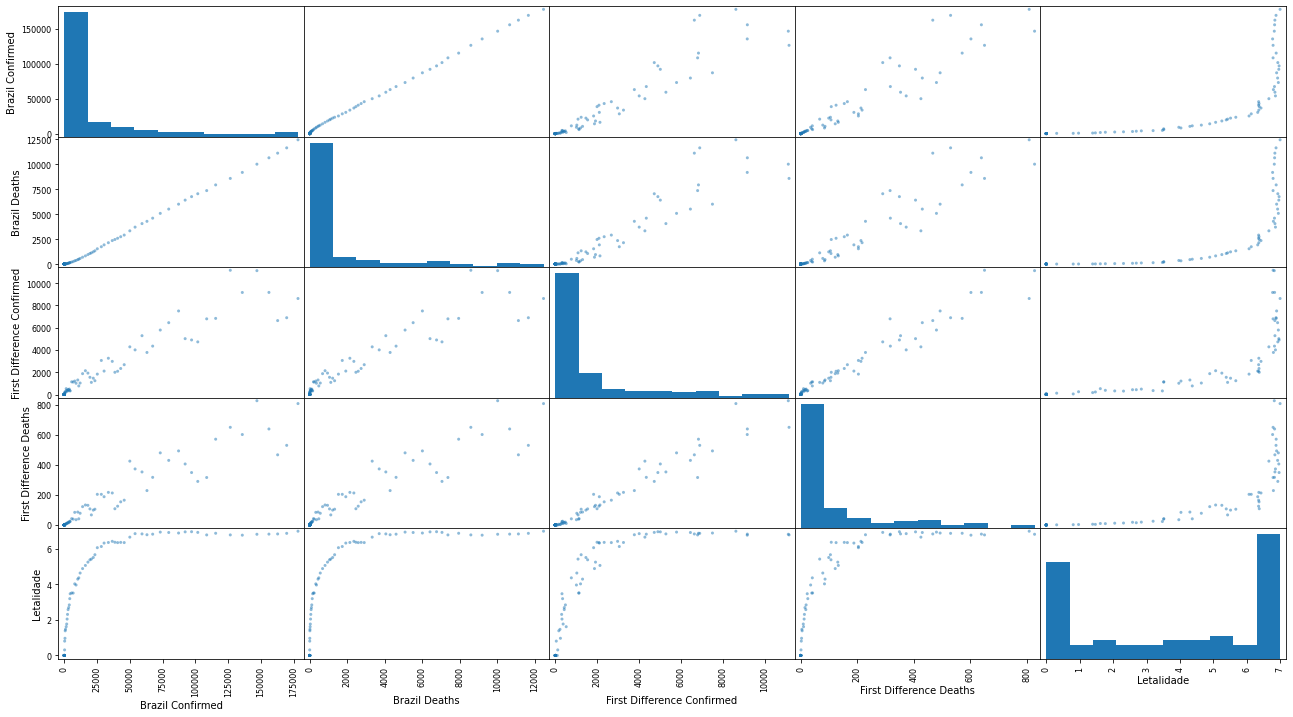

In [19]:
scatter_matrix(Brazil,figsize=(22,12));

Evolução da letalidade da doença, se estabilizando em 7% de todos que são diagnosticados positivos

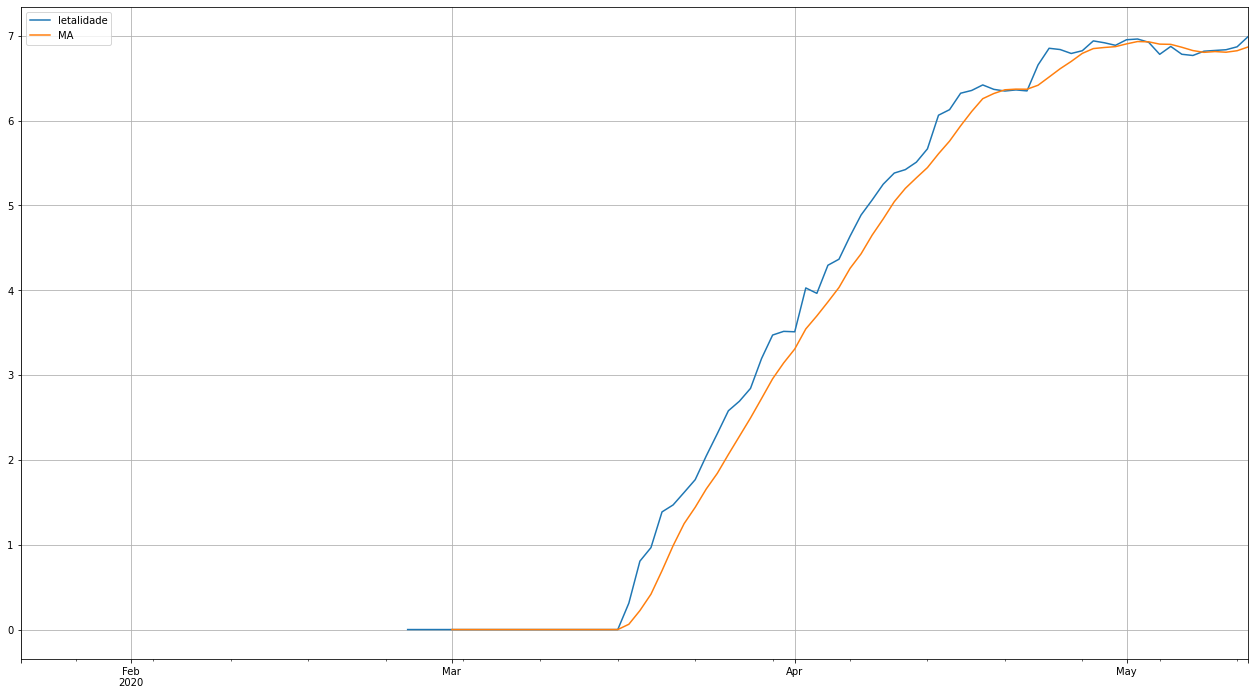

In [20]:
Brazil['Letalidade'].plot(figsize=(22,12), label = 'letalidade')
Brazil.rolling(window=5).mean()['Letalidade'].plot(label = 'MA',grid=True)
plt.legend()

Letalidade média de 6,61% nos ultimos 20 dias.

In [21]:
Brazil['Letalidade'][-20:].mean()

6.855647060278936

Comparação entre países

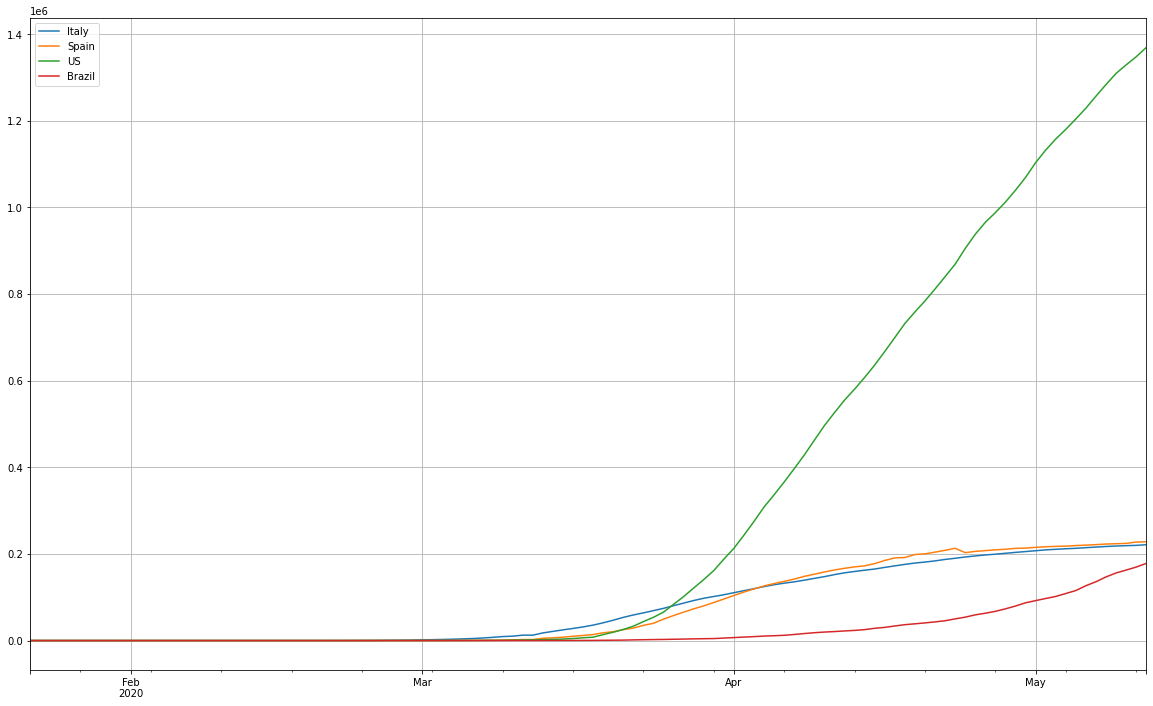

In [22]:
paises = ['Italy','Spain','US','Brazil']
comparador = confirmed_clean[paises]
comparador.plot(figsize = (20,12),grid=True)

criterio = 100
data_pais1 = comparador_deaths[comparador_deaths['Brazil']>criterio].index[0]
data_pais2 = comparador_deaths[comparador_deaths['Spain']>criterio].index[0]
data_pais3 = comparador_deaths[comparador_deaths['Italy']>criterio].index[0]

switch_sp = (data_pais2 - data_pais3).days
switch_br = (data_pais1 - data_pais3).days

comparador_deaths['Spain'] = comparador_deaths['Spain'].shift(periods = -switch_sp)
comparador_deaths['Brazil'] = comparador_deaths['Brazil'].shift(periods = -switch_br)

comparador_deaths.plot(figsize=(12,8),xlim=('2020-02-20','2020-03-15'),ylim=(0,1000))

In [0]:
US = pd.concat([confirmed_clean['US'],deaths_clean['US']],axis=1)

In [0]:
colindex = ['US Confirmed','US Deaths']
US.columns = colindex

In [0]:
US['First Difference Confirmed'] = US['US Confirmed'] - US['US Confirmed'].shift(1)
US['First Difference Deaths'] = US['US Deaths'] - US['US Deaths'].shift(1)

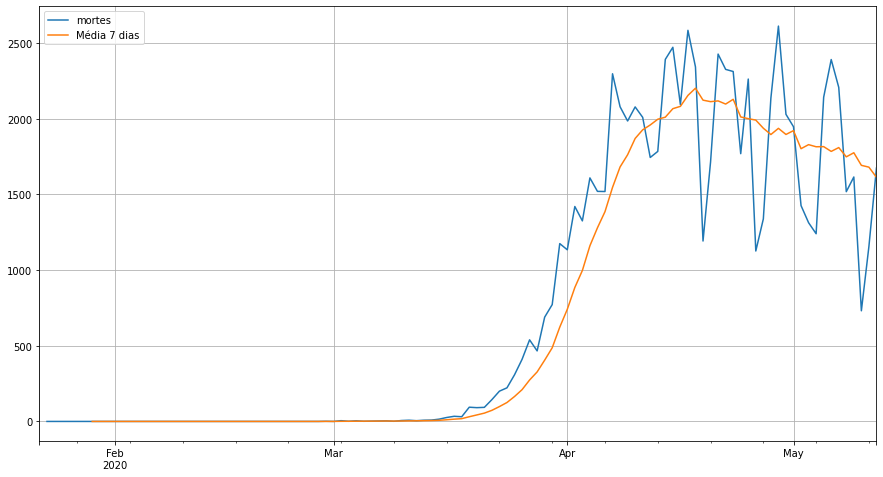

In [26]:
US['First Difference Deaths'].plot(figsize = (15,8),label='mortes')
US['First Difference Deaths'].rolling(7).mean().plot(grid = True, label = 'Média 7 dias',figsize = (15,8))
plt.legend()

Tendencias

In [0]:
BC_cycle, BC_trend = sm.tsa.filters.hpfilter(Brazil['Brazil Confirmed'])

In [0]:
Brazil['BC trend'] = BC_trend

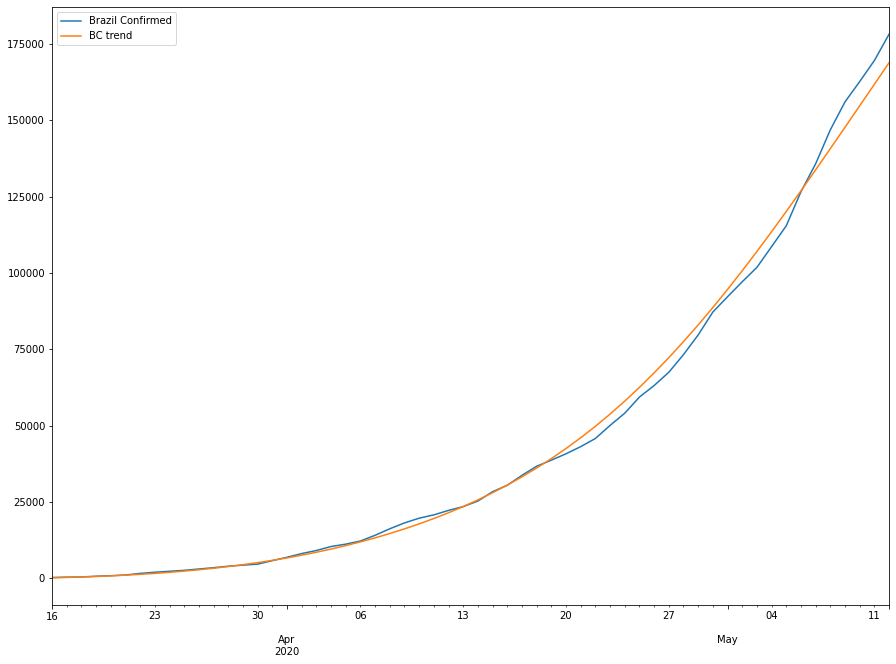

In [29]:
Brazil[['Brazil Confirmed','BC trend']]["2020-03-16":].plot(figsize=(15,11))

In [30]:
type(Brazil['BC trend']['2020-03-16':])

pandas.core.series.Series

In [0]:
from scipy.optimize import curve_fit

In [0]:
def func(x,a,b):
    return a*np.exp(b*x)

Fitting

In [0]:
inicio = '2020-03-17'
final = '2020-05-02'
#yData = Brazil['BC trend'][inicio:final]
yData = Brazil['Brazil Confirmed'][inicio:final]
xData = np.arange(1,len(yData)+1,1)
init_guess = [1,1]

popt,pcov = curve_fit(func,xData,yData,init_guess)
#np.savetxt('/content/drive/My Drive/Colab Notebooks/COVID19/Previsões/2020-04-30.txt', popt, delimiter=',')
#np.savetxt('/content/drive/My Drive/Colab Notebooks/COVID19/Previsões/fitval2020-04-30.txt', fit, delimiter=',')

Tests

In [0]:
xfit = np.arange(1,60,0.01)
yfit = func(xfit,*popt)
yDataNew = Brazil['Brazil Confirmed'][inicio:]
xDataNew = np.arange(1,len(yDataNew)+1,1)

No grafico o dia 50 seria 07/05/2020 e o 60 17/05/2020

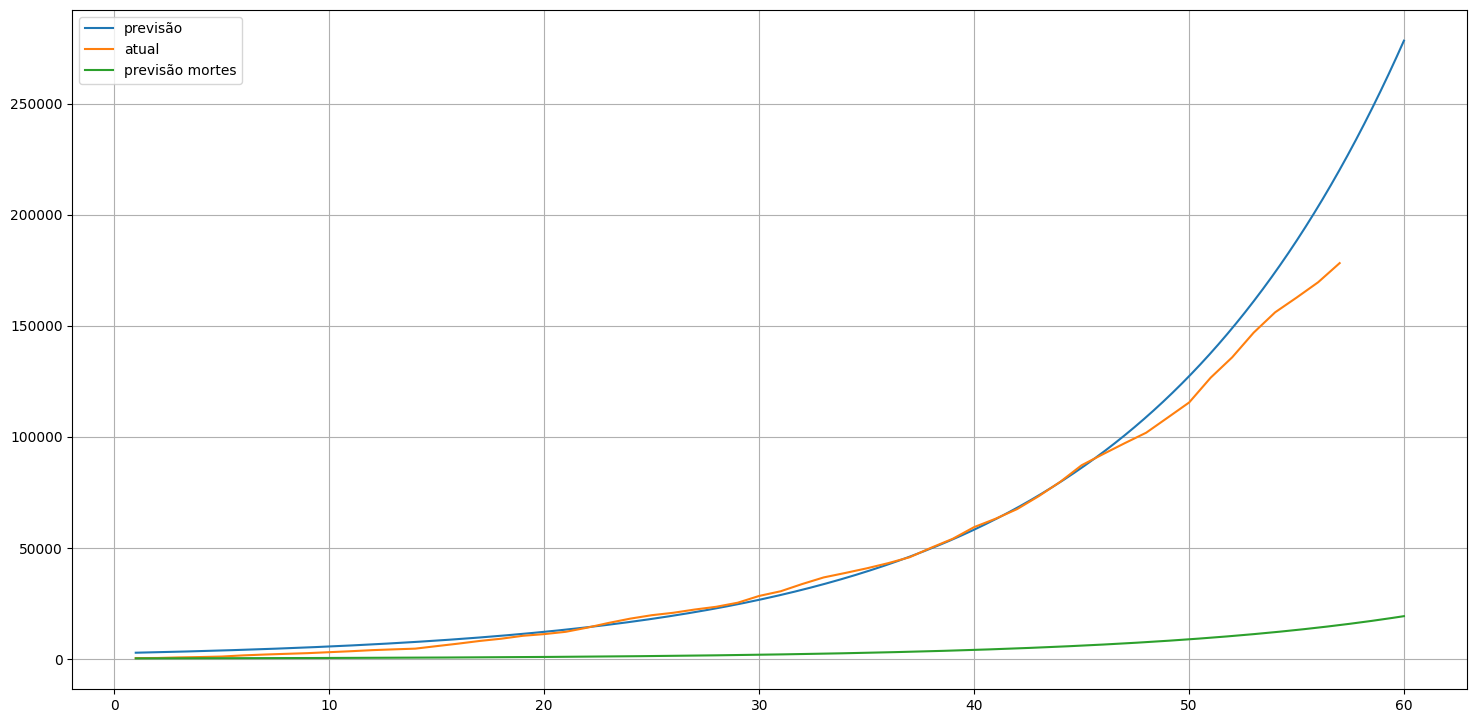

In [35]:
fig = plt.figure(figsize=(18,9),dpi=100)
plt.plot(xfit,yfit,label='previsão')
plt.plot(xDataNew,yDataNew, label = 'atual')
plt.plot(xfit,yfit*(Brazil['Letalidade'][-3:].mean())/100, label = 'previsão mortes')
plt.legend()
plt.grid(True)
yfit[-1]
plt.savefig('/content/drive/My Drive/Colab Notebooks/COVID19/Previsões/2020-05-13')

In [36]:
Brazil

,Brazil Confirmed,Brazil Deaths,First Difference Confirmed,First Difference Deaths,Letalidade,BC trend
2020-01-22,0,0,NaN,NaN,NaN,-2.107028
2020-01-23,0,0,0.0,0.0,NaN,-1.295195
2020-01-24,0,0,0.0,0.0,NaN,-0.482046
2020-01-25,0,0,0.0,0.0,NaN,0.334547
2020-01-26,0,0,0.0,0.0,NaN,1.157011
...,...,...,...,...,...,...
2020-05-08,146894,10017,11121.0,827.0,6.819203,140734.074729
2020-05-09,156061,10656,9167.0,639.0,6.828099,147734.979918
2020-05-10,162699,11123,6638.0,467.0,6.836551,154768.076337
2020-05-11,169594,11653,6895.0,530.0,6.871116,161817.708963
